In [1]:
pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


Choose a dataset (snli, mnli, sick): snli


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/550152 [00:00<?, ? examples/s]

Filter:   0%|          | 0/550152 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Test Accuracy: 0.5777
               precision    recall  f1-score   support

   Entailment       0.58      0.61      0.59      3329
      Neutral       0.57      0.53      0.55      3235
Contradiction       0.58      0.59      0.58      3278

     accuracy                           0.58      9842
    macro avg       0.58      0.58      0.58      9842
 weighted avg       0.58      0.58      0.58      9842



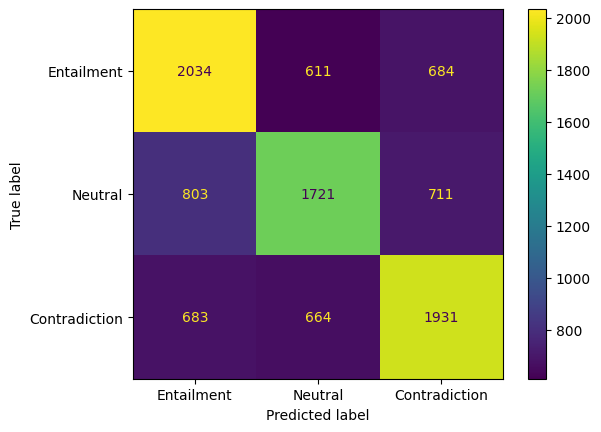

In [2]:
import pickle
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Save object to a pickle file
def save_object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)

# Load object from a pickle file
def load_object(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Function to preprocess data
def preprocess_data(data):
    # Removing instances where the label is -1 (no label)
    data = data.filter(lambda example: example['label'] != -1)
    # Convert columns to list before concatenating
    texts = [f"{p} {h}" for p, h in zip(data['premise'], data['hypothesis'])]
    labels = data['label']
    return texts, labels

# Train the logistic regression model
def train_model(train_texts, train_labels):
    vectorizer = TfidfVectorizer()
    train_features = vectorizer.fit_transform(train_texts)
    model = LogisticRegression(max_iter=10000)
    model.fit(train_features, train_labels)
    return vectorizer, model

# Evaluate the model
def evaluate_model(test_texts, test_labels, vectorizer, model):
    test_features = vectorizer.transform(test_texts)
    predictions = model.predict(test_features)

    accuracy = accuracy_score(test_labels, predictions)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(classification_report(test_labels, predictions, target_names=['Entailment', 'Neutral', 'Contradiction']))

    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Entailment', 'Neutral', 'Contradiction'])
    disp.plot()
    plt.show()

# Main function to load data, train, and evaluate
def main():
    dataset_choice = input("Choose a dataset (snli, mnli, sick): ").strip().lower()
    datasets = {"snli": "snli", "mnli": "multi_nli", "sick": "sick"}

    if dataset_choice not in datasets:
        print("Invalid choice. Exiting.")
        return

    dataset = load_dataset(datasets[dataset_choice])
    train_texts, train_labels = preprocess_data(dataset['train'])
    test_texts, test_labels = preprocess_data(dataset['validation'])

    vectorizer, model = train_model(train_texts, train_labels)
    evaluate_model(test_texts, test_labels, vectorizer, model)

if __name__ == '__main__':
    main()


Choose a dataset (snli, mnli, sick): mnli
Choose validation split (matched, mismatched): mismatched


Filter:   0%|          | 0/9832 [00:00<?, ? examples/s]

Test Accuracy: 0.4693
               precision    recall  f1-score   support

   Entailment       0.47      0.49      0.48      3463
      Neutral       0.42      0.47      0.44      3129
Contradiction       0.53      0.45      0.49      3240

     accuracy                           0.47      9832
    macro avg       0.47      0.47      0.47      9832
 weighted avg       0.47      0.47      0.47      9832



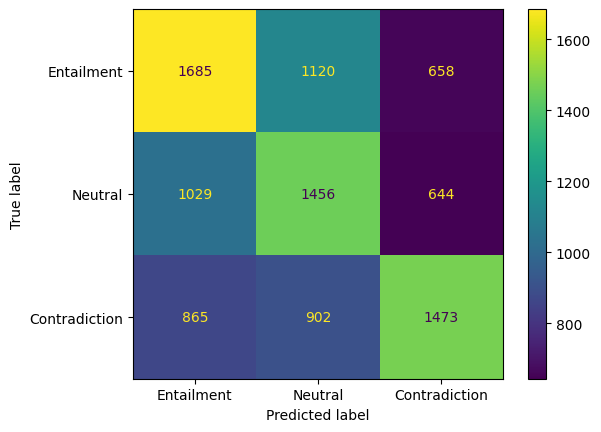

In [6]:
import pickle
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Save object to a pickle file
def save_object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)

# Load object from a pickle file
def load_object(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Function to preprocess data
def preprocess_data(data):
    # Removing instances where the label is -1 (no label)
    data = data.filter(lambda example: example['label'] != -1)
    # Convert columns to list before concatenating
    texts = [f"{p} {h}" for p, h in zip(data['premise'], data['hypothesis'])]
    labels = data['label']
    return texts, labels

# Train the logistic regression model
def train_model(train_texts, train_labels):
    vectorizer = TfidfVectorizer()
    train_features = vectorizer.fit_transform(train_texts)
    model = LogisticRegression(max_iter=10000)
    model.fit(train_features, train_labels)
    return vectorizer, model

# Evaluate the model
def evaluate_model(test_texts, test_labels, vectorizer, model):
    test_features = vectorizer.transform(test_texts)
    predictions = model.predict(test_features)

    accuracy = accuracy_score(test_labels, predictions)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(classification_report(test_labels, predictions, target_names=['Entailment', 'Neutral', 'Contradiction']))

    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Entailment', 'Neutral', 'Contradiction'])
    disp.plot()
    plt.show()

# Main function to load data, train, and evaluate
def main():
    dataset_choice = input("Choose a dataset (snli, mnli, sick): ").strip().lower()
    datasets = {"snli": "snli", "mnli": "multi_nli", "sick": "sick"}

    if dataset_choice not in datasets:
        print("Invalid choice. Exiting.")
        return

    dataset = load_dataset(datasets[dataset_choice])

    # Adjust validation split for MNLI
    if dataset_choice == "mnli":
        val_split = input("Choose validation split (matched, mismatched): ").strip().lower()
        val_key = f"validation_{val_split}"
        if val_key not in dataset:
            print("Invalid validation split. Exiting.")
            return
    else:
        val_key = "validation"

    train_texts, train_labels = preprocess_data(dataset['train'])
    test_texts, test_labels = preprocess_data(dataset[val_key])

    vectorizer, model = train_model(train_texts, train_labels)
    evaluate_model(test_texts, test_labels, vectorizer, model)

if __name__ == '__main__':
    main()


Choose a dataset (snli, mnli, sick): sick
Test Accuracy: 0.6343
               precision    recall  f1-score   support

   Entailment       0.61      0.38      0.47       143
      Neutral       0.64      0.85      0.73       281
Contradiction       0.66      0.27      0.38        71

     accuracy                           0.63       495
    macro avg       0.63      0.50      0.53       495
 weighted avg       0.63      0.63      0.61       495



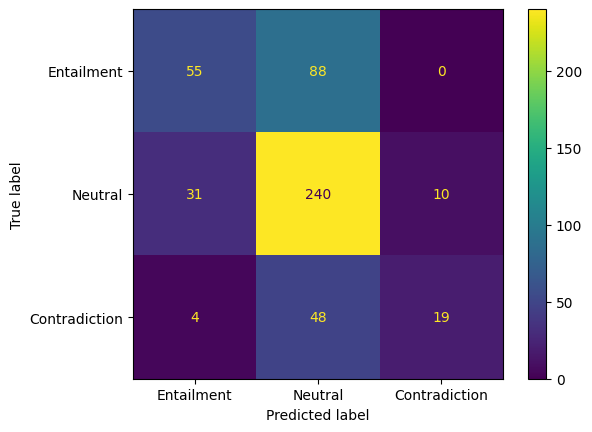

In [7]:
import pickle
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Save object to a pickle file
def save_object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)

# Load object from a pickle file
def load_object(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Function to preprocess data
def preprocess_data(data, dataset_choice):
    if dataset_choice == "sick":
        premises = data['sentence_A']
        hypotheses = data['sentence_B']
        labels = data['label']
    else:
        premises = data['premise']
        hypotheses = data['hypothesis']
        labels = data['label']

    texts = [f"{p} {h}" for p, h in zip(premises, hypotheses)]
    return texts, labels

# Train the logistic regression model
def train_model(train_texts, train_labels):
    vectorizer = TfidfVectorizer()
    train_features = vectorizer.fit_transform(train_texts)
    model = LogisticRegression(max_iter=10000)
    model.fit(train_features, train_labels)
    return vectorizer, model

# Evaluate the model
def evaluate_model(test_texts, test_labels, vectorizer, model):
    test_features = vectorizer.transform(test_texts)
    predictions = model.predict(test_features)

    accuracy = accuracy_score(test_labels, predictions)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(classification_report(test_labels, predictions, target_names=['Entailment', 'Neutral', 'Contradiction']))

    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Entailment', 'Neutral', 'Contradiction'])
    disp.plot()
    plt.show()

# Main function to load data, train, and evaluate
def main():
    dataset_choice = input("Choose a dataset (snli, mnli, sick): ").strip().lower()
    datasets = {"snli": "snli", "mnli": "multi_nli", "sick": "sick"}

    if dataset_choice not in datasets:
        print("Invalid choice. Exiting.")
        return

    dataset = load_dataset(datasets[dataset_choice])

    # Adjust validation split for MNLI
    if dataset_choice == "mnli":
        val_split = input("Choose validation split (matched, mismatched): ").strip().lower()
        val_key = f"validation_{val_split}"
        if val_key not in dataset:
            print("Invalid validation split. Exiting.")
            return
    else:
        val_key = "validation"

    train_texts, train_labels = preprocess_data(dataset['train'], dataset_choice)
    test_texts, test_labels = preprocess_data(dataset[val_key], dataset_choice)

    vectorizer, model = train_model(train_texts, train_labels)
    evaluate_model(test_texts, test_labels, vectorizer, model)

if __name__ == '__main__':
    main()
